## Example H SAF SSM CDR products

In this Example we will read and plot the H SAF SSM CDR products H109, H110 and H111 using the test data included in the ascat package.

In [1]:
import os
import ascat.h_saf as h_saf

test_data_path = os.path.join('..', 'tests','ascat_test_data', 'hsaf')
h109_path = os.path.join(test_data_path, 'h109')
h110_path = os.path.join(test_data_path, 'h110')
h111_path = os.path.join(test_data_path, 'h111')
grid_path = os.path.join(test_data_path, 'grid')
static_layer_path = os.path.join(test_data_path, 'static_layer')

h109_reader = h_saf.H109Ts(h109_path, grid_path, static_layer_path=static_layer_path)
h110_reader = h_saf.H110Ts(h110_path, grid_path, static_layer_path=static_layer_path)
h111_reader = h_saf.H111Ts(h111_path, grid_path, static_layer_path=static_layer_path)

A soil moisture time series is read for a specific grid point. The `data` attribute contains a `pandas.DataFrame` object.

In [2]:
gpi = 2501225
h109_ts = h109_reader.read(gpi)
print(h109_ts.data)

                            corr_flag  dir  proc_flag  sat_id   sm  sm_noise  \
2007-01-01 21:06:01.843200          0    0          0       3   92         3   
2007-01-02 09:18:16.848000          0    1          0       3   91         3   
2007-01-03 10:37:43.104000          0    1          0       3   93         3   
2007-01-04 20:03:56.275200          0    0          0       3   91         3   
2007-01-05 21:23:26.246400          0    0          0       3   97         3   
2007-01-06 09:35:41.251200          0    1          0       3   92         3   
2007-01-06 21:02:37.507200          0    0          0       3   99         3   
2007-01-07 09:14:52.512000          0    1          0       3   88         3   
2007-01-08 10:34:20.582400          0    1          0       3   91         3   
2007-01-09 20:00:33.753600          0    0          0       3   92         3   
2007-01-10 21:20:01.910400          0    0          0       3   90         3   
2007-01-11 09:32:16.915200          0   

### Time series plots of grid points

A simple time series plot of surface soil moisture can be created using `matplotlib`.

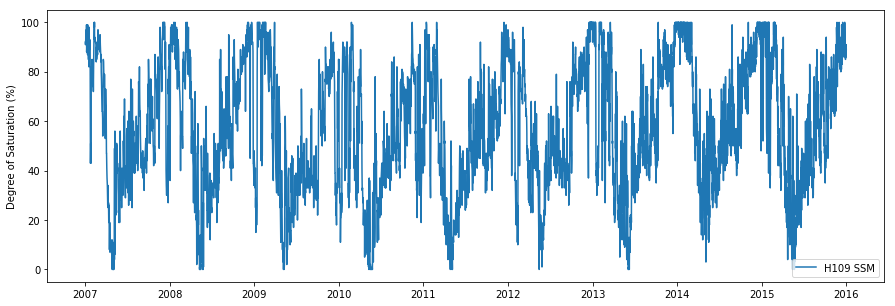

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(h109_ts.data.index, h109_ts.data['sm'], label='H109 SSM')
ax.set_ylabel('Degree of Saturation (%)')
ax.legend()
plt.show()

The SSM CDR H109 can be extended using H110, representing a consistent continuation of the data set

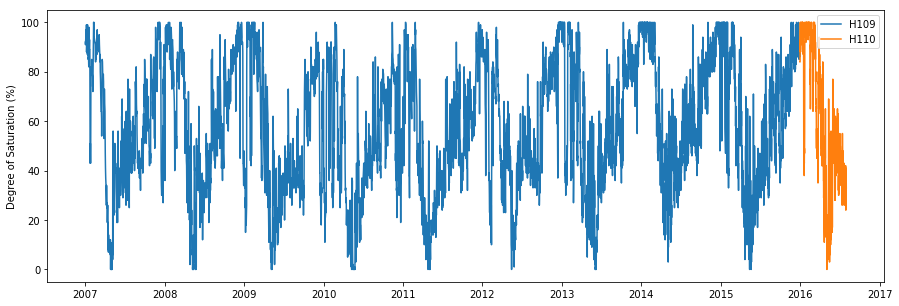

In [4]:
h110_ts = h110_reader.read(gpi)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(h109_ts.data.index, h109_ts.data['sm'], label='H109')
ax.plot(h110_ts.data.index, h110_ts.data['sm'], label='H110')
ax.set_ylabel('Degree of Saturation (%)')
ax.legend()
plt.show()

A soil moisture time series can also be plotted using the plot function provided by the `pandas.DataFrame` object stored in the `.data` attribute. The following example displays several variables stored in the time series.

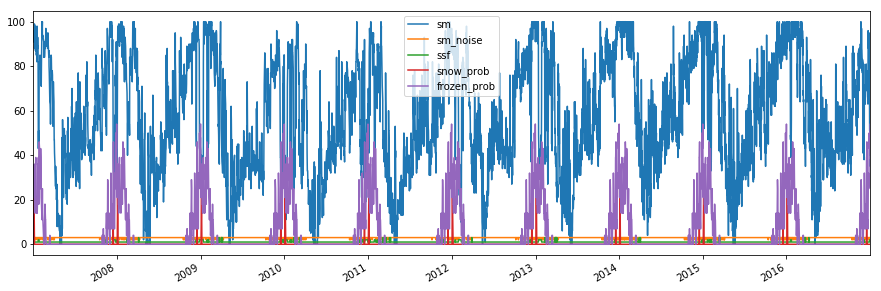

In [5]:
h111_ts = h111_reader.read(gpi)

fields = ['sm', 'sm_noise', 'ssf', 'snow_prob', 'frozen_prob']

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
h111_ts.data[fields].plot(ax=ax)
ax.legend()
plt.show()

### Masking invalid soil moisture measurements

In order to mask invalid/suspicious soil moisture measurements, the confidence flag can be used. It masks soil moisture measurements with a frozen or snow cover probability > 50% and using th eSurface State Flag (SSF) information.

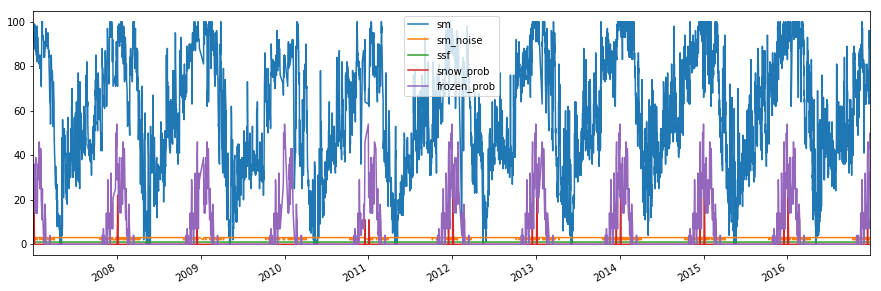

In [6]:
conf_flag_ok = h111_ts.data['conf_flag'] == 0

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
h111_ts.data[conf_flag_ok][fields].plot(ax=ax)
ax.legend()
plt.show()

### Differentiate between Metop-A and Metop-B soil moisture

The `sat_id` field can be used to differentiate between Metop-A (`sat_id`=3) and Metop-B (`sat_id`=4) measurements.

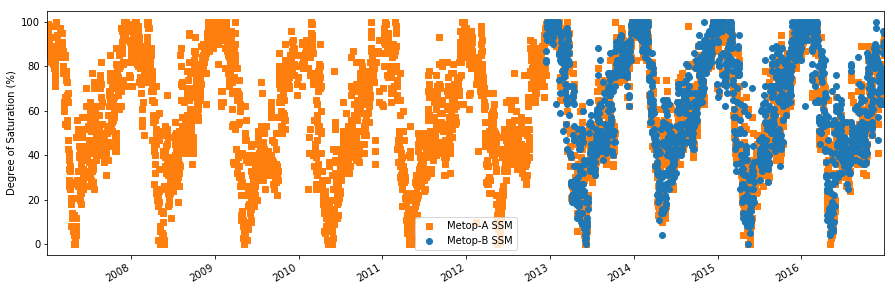

In [7]:
metop_a = h111_ts.data[conf_flag_ok]['sat_id'] == 3
metop_b = h111_ts.data[conf_flag_ok]['sat_id'] == 4

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
h111_ts.data[conf_flag_ok]['sm'][metop_a].plot(ax=ax, ls='none', marker='s', color='C1', label='Metop-A SSM')
h111_ts.data[conf_flag_ok]['sm'][metop_b].plot(ax=ax, ls='none', marker='o', color='C0', label='Metop-B SSM')
ax.set_ylabel('Degree of Saturation (%)')
ax.legend()
plt.show()

### Convert to absolute surface soil moisture

It is possible to convert relative surface soil moisture given in degree of saturation into absolute soil moisture ($m^3 m^{-3}$) using the `absolute_sm` keyword during reading. Porosity information provided by [NOAH GLDAS](https://ldas.gsfc.nasa.gov/gldas/GLDASsoils.php) and pre-computed porosity from the [Harmonized World Soil Database (HWSD)](http://www.fao.org/soils-portal/soil-survey/soil-maps-and-databases/harmonized-world-soil-database-v12/en/) using the formulas of [Saxton and Rawls (2006)](https://dl.sciencesocieties.org/publications/sssaj/abstracts/70/5/1569) is used to produce volumetric surface soil moisture expressed in $m^{3} m^{-3}$.

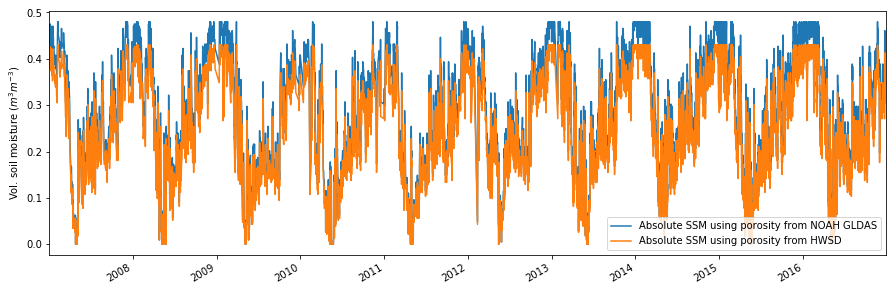

In [8]:
h111_ts = h111_reader.read(gpi, absolute_sm=True)
conf_flag_ok = h111_ts.data['conf_flag'] == 0

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
h111_ts.data[conf_flag_ok]['abs_sm_gldas'].plot(ax=ax, label='Absolute SSM using porosity from NOAH GLDAS')
h111_ts.data[conf_flag_ok]['abs_sm_hwsd'].plot(ax=ax, label='Absolute SSM using porosity from HWSD')
ax.set_ylabel('Vol. soil moisture ($m^3 m^{-3}$)')
ax.legend()
plt.show()